In [4]:
import pandas as pd
from prophet import Prophet

In [77]:
df = pd.read_csv("./Final_Datset/final_co2.csv")
df.head()

,country,year,co2
0,Armenia,1830,0.000
1,Armenia,1952,1.783
2,Armenia,1953,1.885
3,Armenia,1954,2.057
4,Armenia,1955,2.333


In [113]:
india = df.loc[df['country'] == "India"]
india = india.sort_values(by='year')

In [114]:
india['year'] = pd.to_datetime(india['year'], format='%Y')


In [115]:
india.drop('country',axis=1,inplace=True)
india

,year,co2
4799,1858-01-01,0.395
4800,1859-01-01,0.637
4801,1860-01-01,0.644
4802,1861-01-01,0.498
4803,1862-01-01,0.551
...,...,...
4746,2016-01-01,2382.223
4747,2017-01-01,2433.856
4748,2018-01-01,2599.806
4749,2019-01-01,2625.968


In [116]:
india.columns = ['ds','y']
india

,ds,y
4799,1858-01-01,0.395
4800,1859-01-01,0.637
4801,1860-01-01,0.644
4802,1861-01-01,0.498
4803,1862-01-01,0.551
...,...,...
4746,2016-01-01,2382.223
4747,2017-01-01,2433.856
4748,2018-01-01,2599.806
4749,2019-01-01,2625.968


In [117]:
m = Prophet(interval_width=0.95)

In [118]:
training_run = m.fit(india)

14:51:35 - cmdstanpy - INFO - Chain [1] start processing
14:51:35 - cmdstanpy - INFO - Chain [1] done processing


In [119]:
future = m.make_future_dataframe(periods=5,freq='Y')
future

,ds
0,1858-01-01
1,1859-01-01
2,1860-01-01
3,1861-01-01
4,1862-01-01
...,...
163,2020-12-31
164,2021-12-31
165,2022-12-31
166,2023-12-31


In [121]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1858-01-01,33.503675,-178.274848,156.392039,33.503675,33.503675,-47.224072,-47.224072,-47.224072,-47.224072,-47.224072,-47.224072,0.0,0.0,0.0,-13.720397
1,1859-01-01,34.254910,-176.756940,154.490081,34.254910,34.254910,-47.774875,-47.774875,-47.774875,-47.774875,-47.774875,-47.774875,0.0,0.0,0.0,-13.519965
2,1860-01-01,35.006145,-160.718921,154.665821,35.006145,35.006145,-48.100483,-48.100483,-48.100483,-48.100483,-48.100483,-48.100483,0.0,0.0,0.0,-13.094338
3,1861-01-01,35.759438,-176.705085,145.710837,35.759438,35.759438,-46.449021,-46.449021,-46.449021,-46.449021,-46.449021,-46.449021,0.0,0.0,0.0,-10.689583
4,1862-01-01,36.510673,-178.586650,149.135245,36.510673,36.510673,-47.224072,-47.224072,-47.224072,-47.224072,-47.224072,-47.224072,0.0,0.0,0.0,-10.713399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2020-12-31,2471.537914,2262.088484,2582.804777,2470.157705,2472.830390,-46.343931,-46.343931,-46.343931,-46.343931,-46.343931,-46.343931,0.0,0.0,0.0,2425.193983
164,2021-12-31,2532.412087,2334.572923,2632.874773,2527.805357,2536.472568,-45.319684,-45.319684,-45.319684,-45.319684,-45.319684,-45.319684,0.0,0.0,0.0,2487.092403
165,2022-12-31,2593.286260,2391.906325,2699.671645,2583.264291,2601.613244,-44.074215,-44.074215,-44.074215,-44.074215,-44.074215,-44.074215,0.0,0.0,0.0,2549.212045
166,2023-12-31,2654.160433,2449.364609,2782.149908,2638.594484,2667.553918,-42.609597,-42.609597,-42.609597,-42.609597,-42.609597,-42.609597,0.0,0.0,0.0,2611.550837


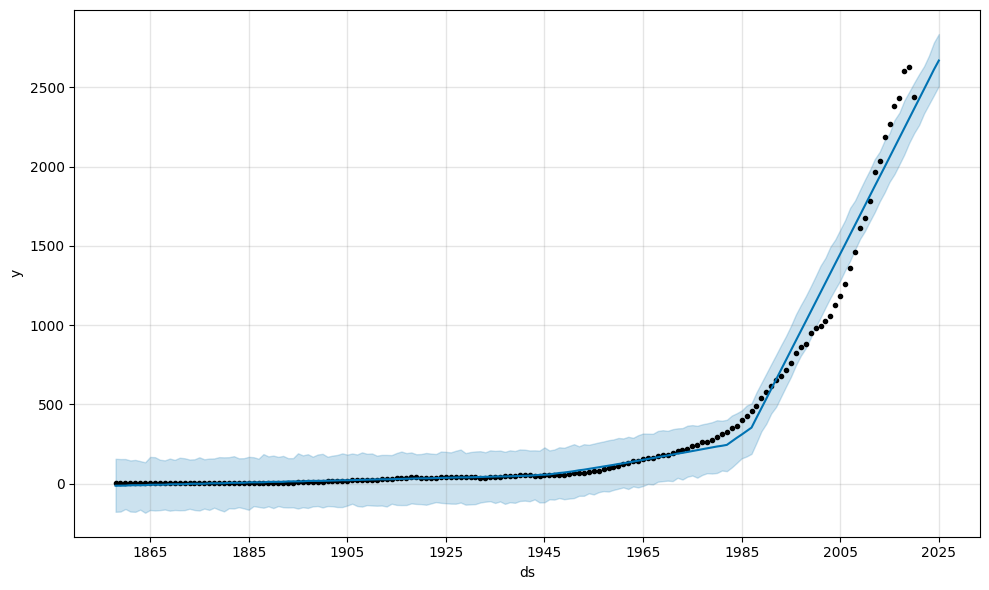

In [122]:
plot1 = m.plot(forecast)

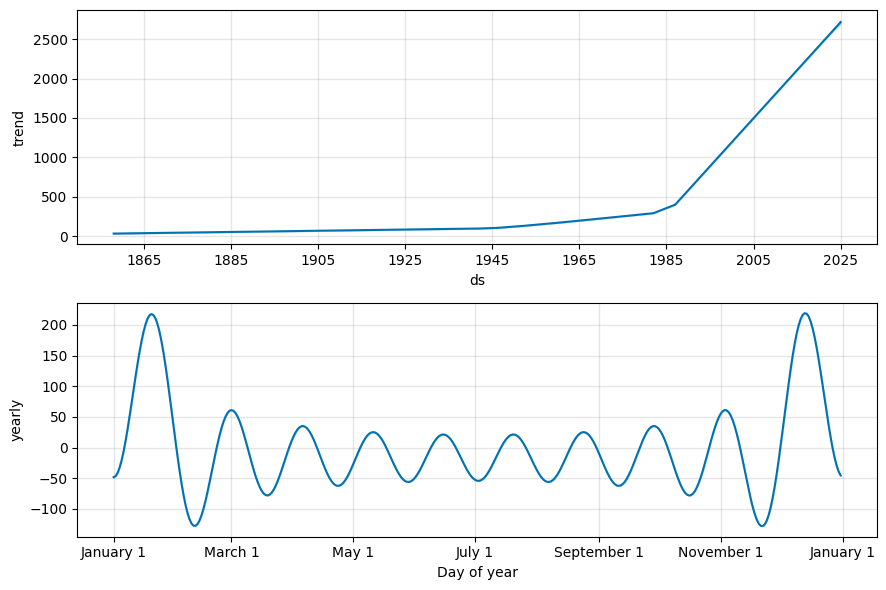

In [123]:
plot2 = m.plot_components(forecast)